In [1]:
import ROOT
import numpy as np
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.18/00


In [20]:
pref = "/global/project/projectdirs/atlas/sambt/pythia83-output/optimal-classifiers/kernel-1/"
ROOT.gStyle.SetPalette(ROOT.kRainBow)
#cols = ROOT.TColor.GetPalette()
cols = [1,2,3,4,6,7,8,9]
 
def get_hist(file,var,cut=1):
    f = ROOT.TFile(pref+file+"/total.root")
    t = f.Get("EventTree")
    ctmp = ROOT.TCanvas("ctmp","ctmp")
    n = t.GetEntries()
    t.Draw(var,"({0:.8f})*({1})".format(1.0/n,cut),"hist")
    h = ctmp.GetListOfPrimitives()[0].Clone()
    h.SetDirectory(0)
    f.Close()
    #del ctmp
    return h

qd = {"qd0.4":"H2qq-CF3.0CA3.0-sqg0100-esq0000-r0.4",
      "qd1.0":"H2qq-CF3.0CA3.0-sqg0100-esq0000-r1.0",
      "qd1.5":"H2qq-CF3.0CA3.0-sqg0100-esq0000-r1.5"}
qm = {"qm0.4":"H2qq-CF3.0CA3.0-sqg0100-esq0011-r0.4",
      "qm1.0":"H2qq-CF3.0CA3.0-sqg0100-esq0011-r1.0",
      "qm1.5":"H2qq-CF3.0CA3.0-sqg0100-esq0011-r1.5"}
gd = {"gd0.4":"H2gg-CF3.0CA3.0-sqg0100-r0.4",
      "gd1.0":"H2gg-CF3.0CA3.0-sqg0100-r1.0",
      "gd1.5":"H2gg-CF3.0CA3.0-sqg0100-r1.5"}

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


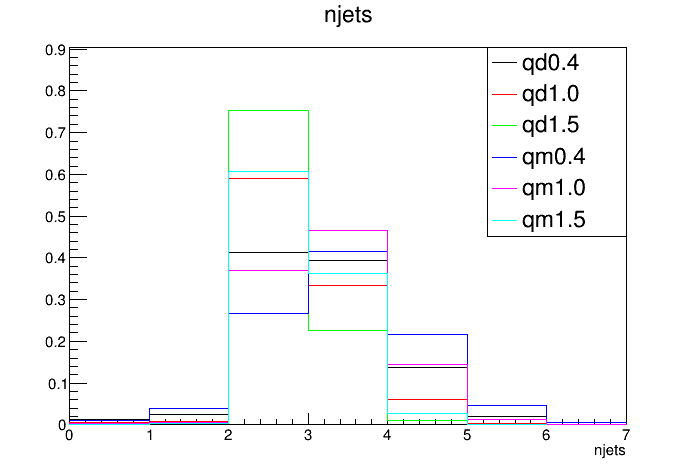

In [31]:
var = "njets"
cut = 1
leg = ROOT.TLegend(0.7,0.5,0.9,0.9)
hists = []
mx = -1
rebin = 1
for i, k in enumerate(qd.keys()):
    h = get_hist(qd[k],var,cut=cut)
    h.Rebin(rebin)
    h.SetTitle(var)
    h.SetLineColor(cols[i])
    if h.GetMaximum() > mx:
        mx = h.GetMaximum()
    hists.append(h)
    leg.AddEntry(h,k,"l")
mod_hists = []
for i,k in enumerate(qm.keys()):
    h = get_hist(qm[k],var,cut=cut)
    h.Rebin(rebin)
    h.SetTitle(var)
    h.SetLineColor(cols[3+i])
    if h.GetMaximum() > mx:
        mx = h.GetMaximum()
    mod_hists.append(h)
    leg.AddEntry(h,k,"l")
c = ROOT.TCanvas("c")
for h in hists:
    h.SetMaximum(1.2*mx)
    h.Draw("histsame")
for h in mod_hists:
    h.SetMaximum(1.2*mx)
    h.Draw("histsame")
leg.Draw()
c.Draw()